<img align="left" src="viisar.png"  height="120" width="120">
<div align="left">
<div> <b> In1024 </b></div>
<div> Processamento de Imagens </div>
<div> Pedro D. Marrero Fernandez</div>
<div> https://sites.google.com/a/cin.ufpe.br/in1024/home</div>
<div> pdmf@cin.ufpe.br </div>
<div> :), :(, :/</div>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import cv2
from sklearn.cluster import MiniBatchKMeans

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:
def showcolorchanels( image ):    
    plt.figure( figsize=(18,18) )
    plt.subplot(131)
    plt.imshow(image[:,:,0], cmap='gray' )
    plt.subplot(132)
    plt.imshow(image[:,:,1], cmap='gray' )
    plt.subplot(133)
    plt.imshow(image[:,:,2], cmap='gray' )
    plt.show()
    
def showresults( imagein, imageout ):
    plt.figure( figsize=(18,18) )
    plt.subplot(121)
    plt.imshow(imagein  )
    plt.subplot(122)
    plt.imshow(imageout  )
    plt.show()
    
    

# Color Model

Original image BGR:


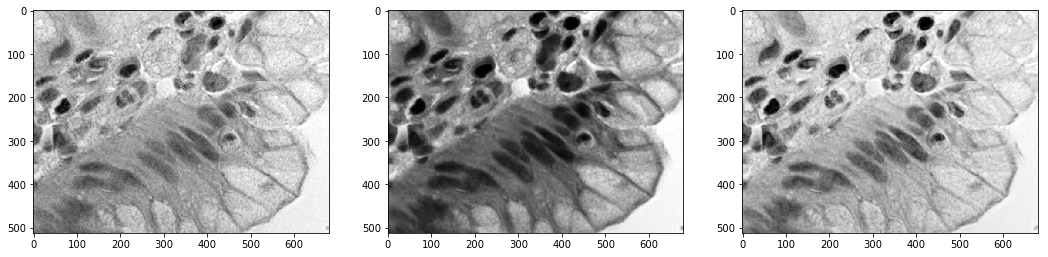

Image HSV:


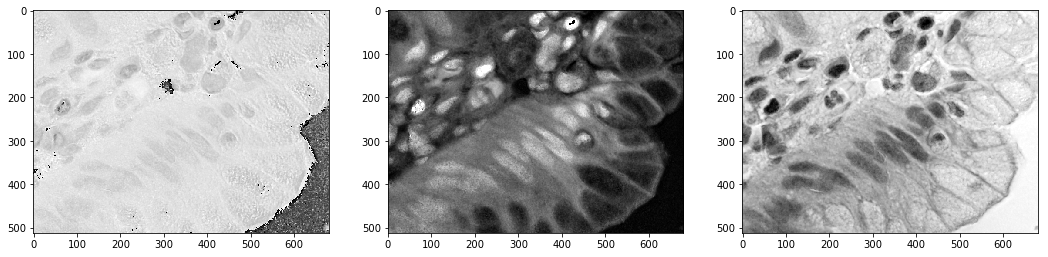

Image YCrCb:


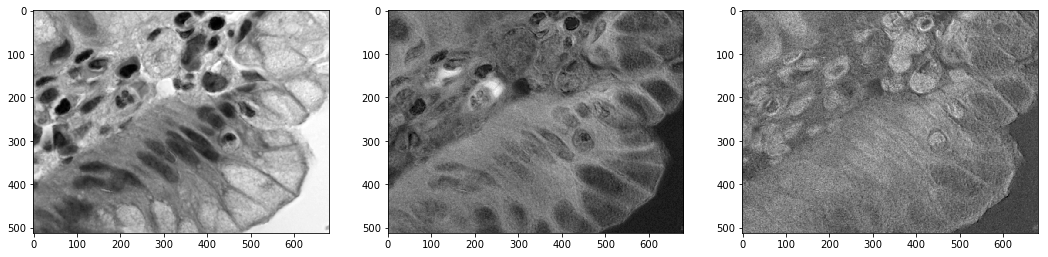

Image LAB:


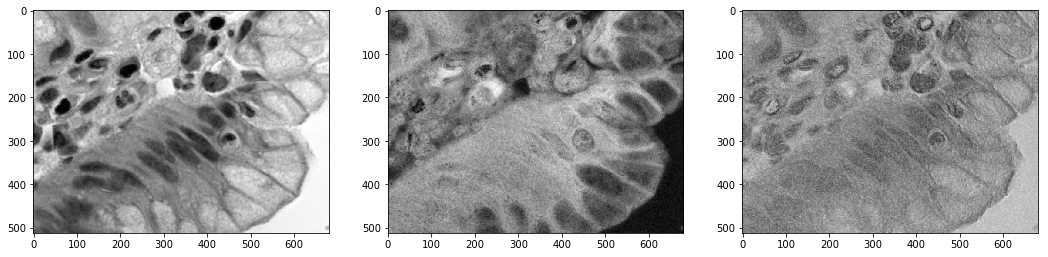

In [3]:

image = cv2.imread('cell001.png')

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
ycb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

print('Original image BGR:')
showcolorchanels( image )
print('Image HSV:')
showcolorchanels( hsv )
print('Image YCrCb:')
showcolorchanels( ycb )
print('Image LAB:')
showcolorchanels( lab )


# Segmentation

In [4]:
def quantized(imagein, k=5):

    h,w = imagein.shape[:2]
    image = cv2.cvtColor(imagein, cv2.COLOR_BGR2LAB)

    # reshape the image into a feature vector so that k-means
    # can be applied
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    # apply k-means using the specified number of clusters and
    # then create the quantized image based on the predictions
    clt = MiniBatchKMeans(n_clusters =  k )
    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

    # reshape the feature vectors to images
    quant = quant.reshape((h, w, 3))
    #image = image.reshape((h, w, 3))

    # convert from L*a*b* to RGB
    imquant = cv2.cvtColor(quant, cv2.COLOR_LAB2RGB)
    #image = cv2.cvtColor(image, cv2.COLOR_LAB2RGB)
    
    return imquant

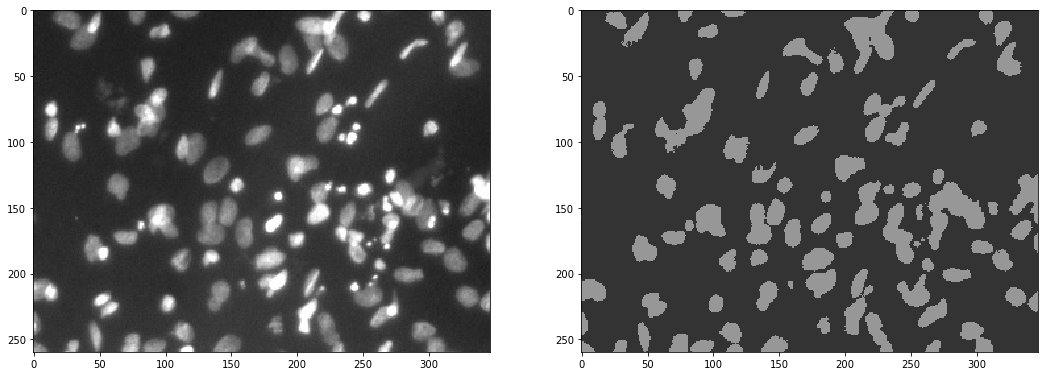

In [5]:
image = cv2.imread('cell002.png')
imquant = quantized(image, k=2)
showresults( image[:,:,(2,1,0)], imquant )